In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
def y_func(x: float, coef_1: float, coef_2: float, coef_3: float) -> float:
    return coef_1 * x + coef_2 * math.sin(x) + coef_3

In [5]:
def y_func_with_noise(x: float, coef_1: float, coef_2: float, coef_3: float) -> float:
    return coef_1 * x + coef_2 * math.sin(x) + coef_3 + np.random.normal(0, 1)

In [17]:
coef_1 = round(random.uniform(-5, 5), 2)
coef_2 = round(random.uniform(-5, 5), 2)
coef_3 = round(random.uniform(-5, 5), 2)
print(f'{coef_1}x + {coef_2}sin(x) + {coef_3}')

-1.16x + -0.22sin(x) + -1.77


In [18]:
def frange(start, stop, step):
	i = start
	while i < stop:
		yield i
		i += step

In [39]:
xs = list(frange(-10, 10, 0.1))

y = []
for x in xs:
    y.append(y_func(x, coef_1, coef_2, coef_3))

y_noise = []
for x in xs:
    y_noise.append(y_func_with_noise(x, coef_1, coef_2, coef_3))

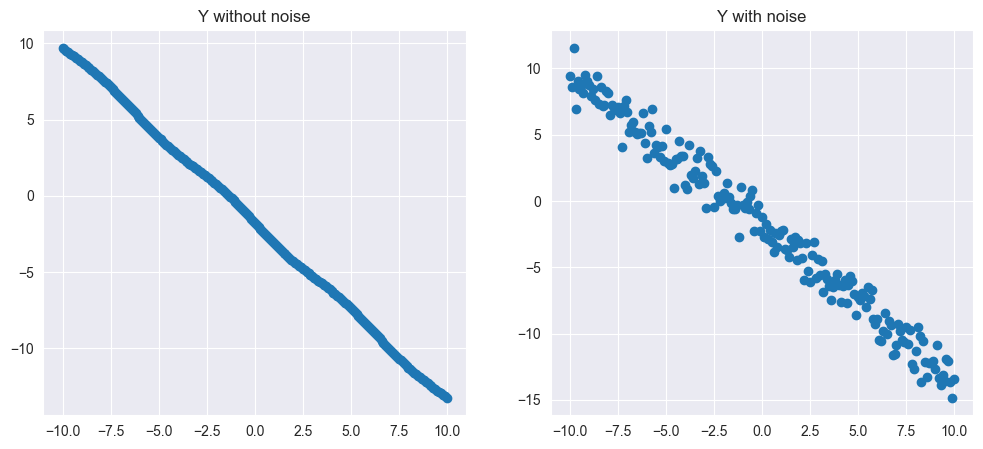

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(xs, y)
plt.title('Y without noise')

plt.subplot(122)
plt.scatter(xs, y_noise)
plt.title('Y with noise')
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
linear_model = LinearRegression()
# pf = PolynomialFeatures(degree=15)
X = np.array(xs).reshape(-1, 1)
# X_poly = pf.fit_transform(X)
linear_model.fit(X, y_noise)
yp = linear_model.predict(X)
print(mean_absolute_error(y_noise, yp))

0.8067999617760528


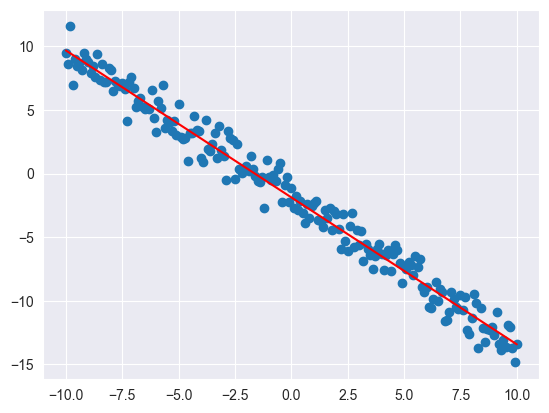

In [44]:
plt.figure()
plt.scatter(xs, y_noise)
plt.plot(xs, yp, color='red')
plt.show()

In [34]:
coef_11 = round(random.uniform(-5, 5), 2)
coef_22 = round(random.uniform(-5, 5), 2)
coef_33 = round(random.uniform(-5, 5), 2)
print(f'{coef_11}x + {coef_22}sin(x) + {coef_33}')

1.55x + -2.78sin(x) + 4.25


In [69]:
xs = list(frange(-10, 10, 0.1))

y = []
for x in xs:
    y.append(y_func(x, coef_11, coef_22, coef_33))

y_noise = []
for x in xs:
    y_noise.append(y_func_with_noise(x, coef_11, coef_22, coef_33))

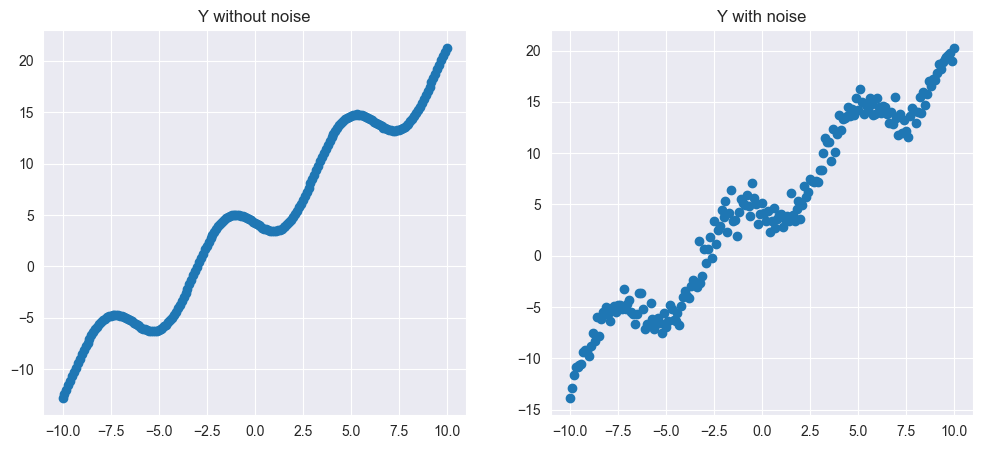

In [70]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(xs, y)
plt.title('Y without noise')

plt.subplot(122)
plt.scatter(xs, y_noise)
plt.title('Y with noise')
plt.show()

In [71]:
X = np.array(xs).reshape(-1, 1)

print(X.shape)

(201, 1)


In [77]:
linear_model = LinearRegression()
linear_model.fit(X, y_noise)
pred_y = linear_model.predict(X)
print(mean_absolute_error(y_noise, pred_y))
print(linear_model.coef_)

1.7605144932891916
[1.49613641]


In [106]:
pf = PolynomialFeatures(degree=5)
X_poly = pf.fit_transform(X)
print(X_poly.shape)

(201, 6)


In [89]:
linear_model = LinearRegression()
linear_model.fit(X_poly, y_noise)
pred_y = linear_model.predict(X_poly)
print(mean_absolute_error(y_noise, pred_y))
# print(linear_model.coef_)

0.6687761218068409


In [101]:
X = np.array(list(frange(-10, 10, 0.1))).reshape(-1, 1)

In [92]:
degrees = list(range(1, 30))
errors = []
for degree in degrees:
    pf = PolynomialFeatures(degree=degree)
    X_poly = pf.fit_transform(X)

    linear_model = LinearRegression()
    linear_model.fit(X_poly, y_noise)
    pred_y = linear_model.predict(X_poly)
    errors.append(mean_squared_error(y_noise, pred_y))

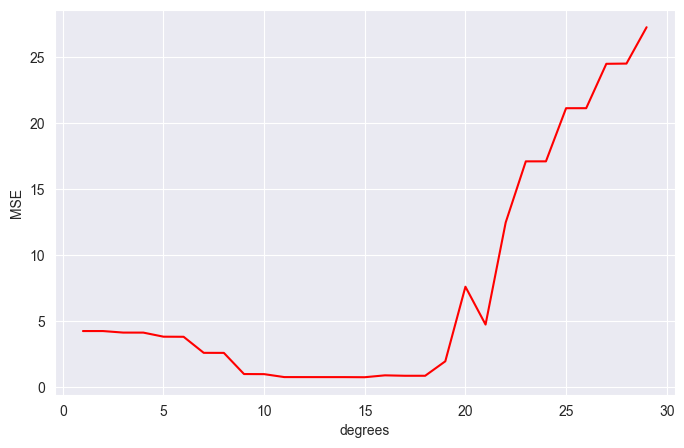

In [100]:
plt.figure(figsize=(8,5))
plt.plot(degrees, errors, color='red')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.show()

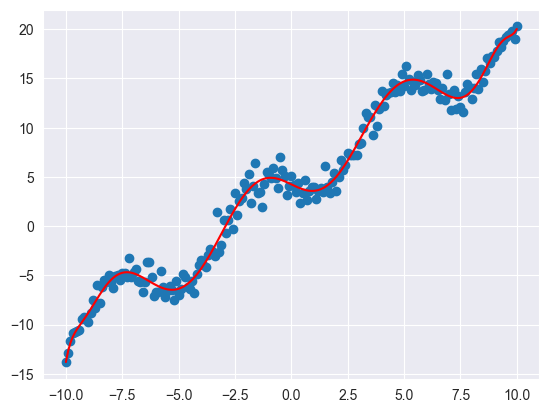

In [90]:
plt.figure()
plt.scatter(X, y_noise)
plt.plot(X, pred_y, color='red')
plt.show()